# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading the Files

In [3]:
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentInfo = pd.read_csv('studentInfo.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')
studentVle = pd.read_csv('studentVle.csv')
vle = pd.read_csv('vle.csv')

# Identifying the Columns

In [4]:
set1 = list(assessments.columns.values)
set2 = list(courses.columns.values)
set3 = list(studentAssessment.columns.values)
set4 = list(studentInfo.columns.values)
set5 = list(studentRegistration.columns.values)
set6 = list(studentVle.columns.values)
set7 = list(vle.columns.values)

In [5]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [6]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [7]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [8]:
print(studentInfo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
None


## There are 28785 unique students who have taken seven unique courses over 2 years (four semesters) making 32593 observations

In [9]:
studentInfo['id_student'] = studentInfo['id_student'].astype('object')

In [10]:
studentInfo.describe(include='object')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,disability,final_result
count,32593,32593,32593,32593,32593,32593,31482,32593,32593,32593
unique,7,4,28785,2,13,5,10,3,2,4
top,BBB,2014J,584077,M,Scotland,A Level or Equivalent,20-30%,0-35,N,Pass
freq,7909,11260,5,17875,3446,14045,3654,22944,29429,12361


#
Out[128]:
Pass           12358
Fail            5768
Withdrawn       4693
Distinction     3024

In [11]:
studentInfo['final_result'].value_counts()

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

In [12]:
import dexplot as dxp

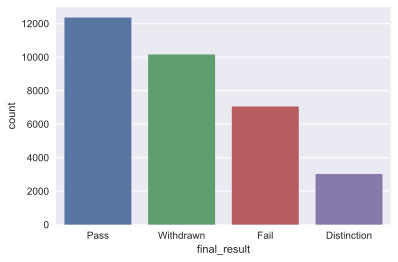

In [13]:
sns.countplot(x='final_result', data=studentInfo)

### Around 30% of the students have with drawn from the courses

AttributeError: 'SubplotSpec' object has no attribute 'get_rows_columns'

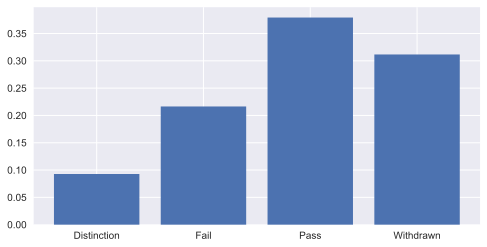

In [15]:
dxp.aggplot(agg='final_result', data=studentInfo, normalize='all', figsize=(8, 4))
#normalizing ie on scale of 0 to 1 helps make conclusions instead of just summing observations

In [ ]:
#dxp.aggplot(agg='race', data=emp, hue='dept')

### Age may not be factor influencing final result but code module may be strong factor
### Code Module 'CCC' and 'DDD' have highest proportion of wihdrawn students but code_module 'GGG' has lowest proportion of withdrawn students

AttributeError: 'SubplotSpec' object has no attribute 'get_rows_columns'

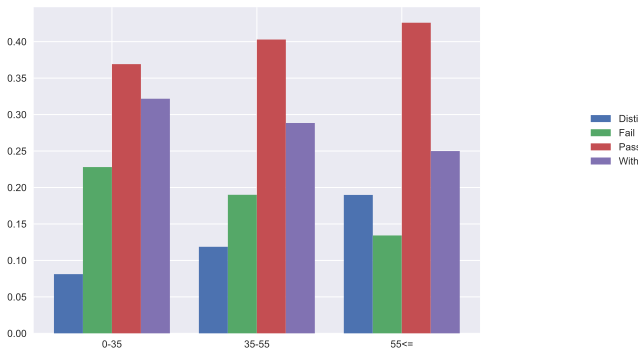

In [16]:

dxp.aggplot(agg='age_band', data=studentInfo, hue='final_result', normalize='age_band',  figsize=(8, 6))

AttributeError: 'SubplotSpec' object has no attribute 'get_rows_columns'

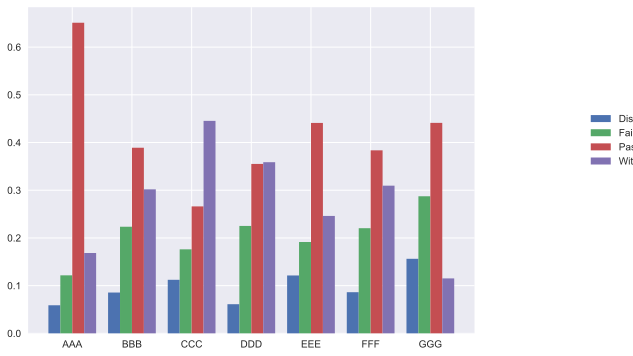

In [18]:
dxp.aggplot(agg='code_module', data=studentInfo, hue='final_result', normalize='code_module',  figsize=(8, 6))


### More proportion of withdrawn students are found in lower bands of Index of Multiple Depravation (IMD). Lower the band , higher the depraved conditions the students were living during the course module

AttributeError: 'SubplotSpec' object has no attribute 'get_rows_columns'

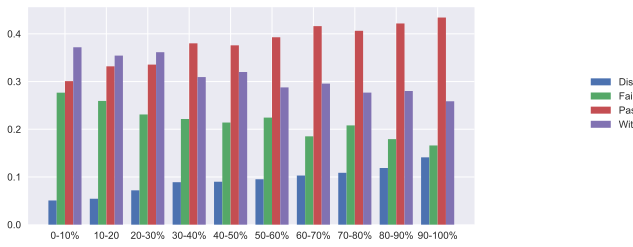

In [19]:
#imd_band
ax = dxp.aggplot(agg='imd_band', data=studentInfo, hue='final_result', normalize='imd_band',  figsize=(8, 4))

### Disability may be significant factor in detremining the final result. Higher proportion of withdrawn students were found in disabled category. But gender may not have any influence in determining the final_result 

AttributeError: 'SubplotSpec' object has no attribute 'get_rows_columns'

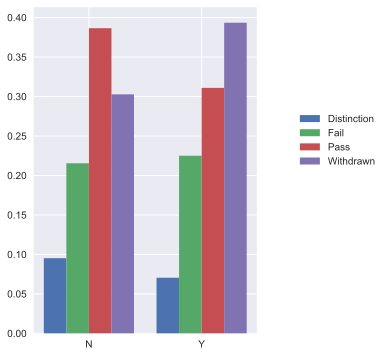

In [26]:
dxp.aggplot(agg='disability', data=studentInfo, hue='final_result', normalize='disability',  figsize=(4, 6))


AttributeError: 'SubplotSpec' object has no attribute 'get_rows_columns'

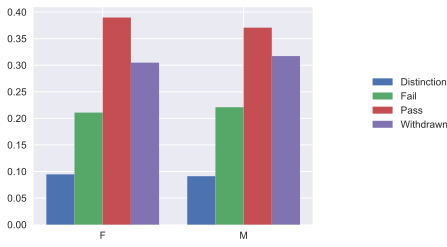

In [28]:
dxp.aggplot(agg='gender', data=studentInfo, hue='final_result', normalize='gender',  figsize=(5, 4))


### Level of education seems to be a significant factor determining the student success. Interestingly code_presentation may be an influencing factor. Courses starting in Febrauary ("B”) has considerably higher proportion of withdrawns than courses starting in October ("J")

AttributeError: Unknown property normalize

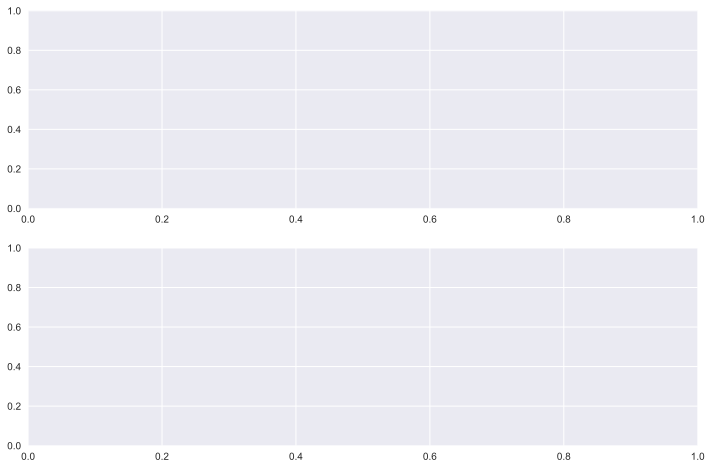

In [31]:
#highest_education #code_presentation

_, axes = plt.subplots(2, 1, sharey=True, figsize=(12, 8))

sns.countplot(x='highest_education', hue='final_result', data=studentInfo, ax=axes[0]);
sns.countplot(x='code_presentation', hue='final_result', data=studentInfo, ax=axes[1]);

AttributeError: 'SubplotSpec' object has no attribute 'get_rows_columns'

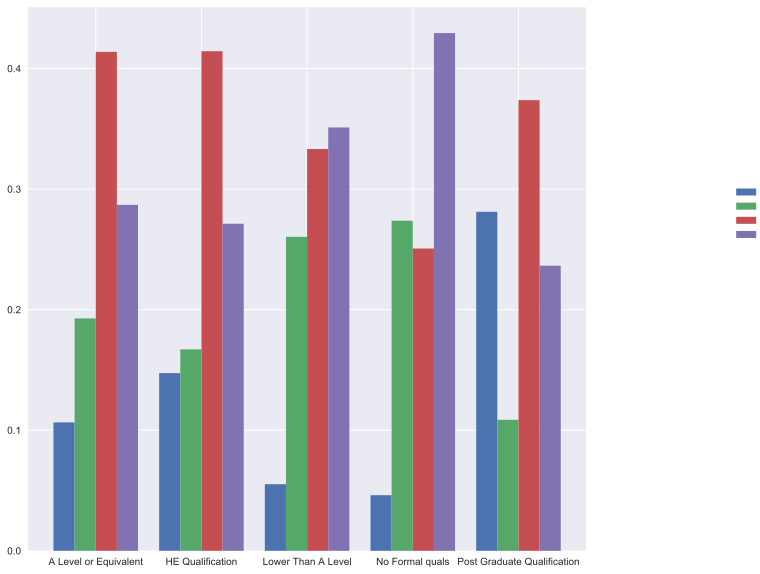

In [37]:
#above normalized

dxp.aggplot(agg='highest_education', hue='final_result', data=studentInfo, normalize='highest_education',figsize=(10, 10));

In [38]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [39]:
studentInfo_Complete_df = pd.merge(studentInfo,studentRegistration, how='inner', on=['code_module', 'code_presentation', 'id_student'])  

In [40]:
studentInfo_Complete_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN


In [41]:
studentInfo_Complete_df['date_registration_pos'] = studentInfo_Complete_df['date_registration'] * (-1)

In [42]:
studentInfo_Complete_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,date_registration_pos
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,159.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,53.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,92.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,52.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,176.0


## Surprisingly students who have withdrawn have registered earlier (on average) than students who attempeted the course. We still don't know how significant it is unless if this feature comes up in the modelling as an important one

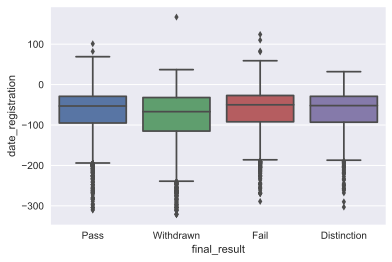

In [46]:
sns.boxplot(x='final_result', y='date_registration', data=studentInfo_Complete_df)

In [47]:
#Creating a new data of students who have withdrawn from the course
students_Withdrawn_df = studentInfo_Complete_df[studentInfo_Complete_df['final_result'] == 'Withdrawn']

In [48]:
students_Withdrawn_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,date_registration_pos
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,92.0
15,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,-180.0,96.0,180.0
22,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,-170.0,72.0,170.0
29,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,5.0,175.0,-5.0
41,AAA,2013J,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Withdrawn,-197.0,135.0,197.0


### Around 240 students have registered after the courses have started

In [49]:
#Sorting students by date_registration values to check how students who have registered after the course started
studentInfo_Complete_df['date_registration'].sort_values(ascending=[False]).head(240)

14178    167.0
13528    124.0
27908    110.0
14612    101.0
21245     83.0
16356     82.0
4821      81.0
1154      69.0
4840      59.0
13514     49.0
160       48.0
7708      44.0
26858     40.0
11448     37.0
10655     37.0
4554      32.0
27287     28.0
26684     28.0
5350      27.0
2906      27.0
14874     24.0
16872     24.0
2526      23.0
11594     23.0
10828     23.0
5282      21.0
245       20.0
5131      20.0
32459     19.0
27772     19.0
         ...  
32080      2.0
770        2.0
31993      2.0
31747      2.0
32284      2.0
31933      2.0
32395      2.0
16814      2.0
21471      2.0
507        2.0
20043      2.0
22215      2.0
26839      2.0
12922      2.0
26380      2.0
4573       2.0
4515       2.0
32149      2.0
95         2.0
32457      2.0
32442      2.0
32231      2.0
4525       2.0
4673       1.0
32549      0.0
22213      0.0
9672      -1.0
4428      -1.0
26574     -1.0
16695     -1.0
Name: date_registration, Length: 240, dtype: float64

In [50]:
studentInfo_Complete_df[studentInfo_Complete_df['date_registration'] == 110]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,date_registration_pos
27908,FFF,2014J,357851,M,East Anglian Region,Lower Than A Level,50-60%,0-35,2,120,Y,Fail,110.0,NaN,-110.0


In [51]:
#Creating a new binary varaible flagging students have registered before the classes have started or not 
studentInfo_Complete_df['registration_before'] = ['Yes' if x <= 0 else 'No' for x in studentInfo_Complete_df['date_registration']] 

In [52]:
studentInfo_Complete_df.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,date_registration_pos,registration_before
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,NaN,4.0,Yes
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,NaN,23.0,Yes
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,NaN,129.0,Yes
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,-49.0,101.0,49.0,Yes
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,-28.0,NaN,28.0,Yes


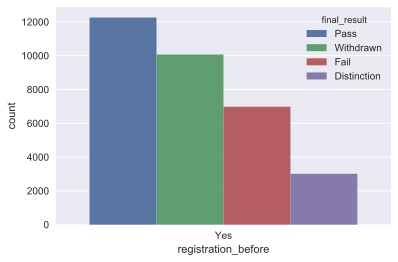

In [53]:
xx= studentInfo_Complete_df[studentInfo_Complete_df['registration_before'] == 'Yes']
plt.figure(figsize=(6,4))
ax = sns.countplot(x='registration_before', hue='final_result', data=xx)

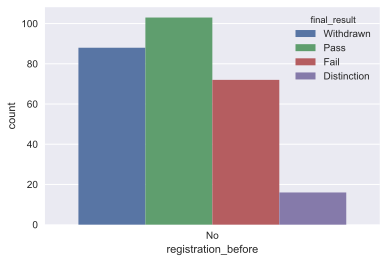

In [54]:
yy= studentInfo_Complete_df[studentInfo_Complete_df['registration_before'] == 'No']
plt.figure(figsize=(6,4))
ax = sns.countplot(x='registration_before', hue='final_result', data=yy)

In [55]:
studentInfo_Complete_df.groupby(['id_student', 'code_module', 'code_presentation']).ngroups

32593

In [56]:
studentInfo_Complete_df.shape

(32593, 16)

## Assesment Metrics 

In [57]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [58]:
assessments.shape

(206, 6)

In [59]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
code_module          206 non-null object
code_presentation    206 non-null object
id_assessment        206 non-null int64
assessment_type      206 non-null object
date                 195 non-null float64
weight               206 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.7+ KB


In [60]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [62]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [63]:
assessments.shape

(206, 6)

In [64]:
# Read in assessment information, joining two files
assmt = pd.read_csv('assessments.csv')
student_assmt = pd.read_csv('studentAssessment.csv') #some columns are dropped
assmt_combined = pd.merge(student_assmt, assmt, how = 'inner', on=['id_assessment'])

#Replacing ? with np.nan
#Converting to float for ease of calculations
a = assmt_combined['score'].values
a[a == '?'] = np.nan
assmt_combined['score'] = a

b = assmt_combined['date'].values
b[b == '?'] = np.nan
assmt_combined['date'] = b


In [65]:
assmt_combined.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [66]:
assmt_combined.shape

(173912, 10)

In [67]:
assmt_combined['id_student'] = assmt_combined['id_student'].astype('object')
assmt_combined.describe(include='object')


,id_student,code_module,code_presentation,assessment_type
count,173912,173912,173912,173912
unique,23369,7,4,3
top,537811,FFF,2014J,TMA
freq,28,54815,52174,98426


In [68]:
assmt_combined.groupby(['id_student', 'code_module', 'code_presentation']).ngroups

25843

In [69]:
assmt_combined.groupby(['id_student', 'code_module']).ngroups

25087

In [70]:
# extracting mean score
mean_score = assmt_combined.groupby(['id_student','code_module','code_presentation'], as_index=False).aggregate(np.mean)[['id_student','code_module','code_presentation', 'score']]
mean_score.rename(columns = {'score':'mean_score'}, inplace = True)
mean_score.head()

,id_student,code_module,code_presentation,mean_score
0,6516,AAA,2014J,61.800000
1,8462,DDD,2013J,87.666667
2,8462,DDD,2014J,86.500000
3,11391,AAA,2013J,82.000000
4,23629,BBB,2013B,82.500000


In [71]:
# extracting mean CMA
df = assmt_combined.groupby(['id_student','code_module','code_presentation','assessment_type'], as_index=False).aggregate(np.mean)
mean_CMA = df.loc[df['assessment_type'] == 'CMA'][[ 'id_student','code_module','code_presentation', 'score']]
mean_CMA.rename(columns = {'score':'CMA_score'}, inplace = True)
mean_CMA.head()


,id_student,code_module,code_presentation,CMA_score
4,23629,BBB,2013B,100.000000
6,23698,CCC,2014J,75.000000
9,23798,BBB,2013J,100.000000
11,24186,GGG,2014B,63.333333
15,24391,GGG,2013J,93.333333


In [72]:
#mean TMA
mean_TMA = df.loc[df['assessment_type'] == 'TMA'][[ 'id_student','code_module','code_presentation', 'score']]
mean_TMA.rename(columns = {'score':'TMA_score'}, inplace = True)
mean_TMA.head()

,id_student,code_module,code_presentation,TMA_score
0,6516,AAA,2014J,61.800000
1,8462,DDD,2013J,87.666667
2,8462,DDD,2014J,86.500000
3,11391,AAA,2013J,82.000000
5,23629,BBB,2013B,65.000000


In [73]:
#mean Exam
mean_Exam = df.loc[df['assessment_type'] == 'Exam'][['id_student','code_module','code_presentation', 'score']]
mean_Exam.rename(columns = {'score':'Exam_score'}, inplace = True)
mean_Exam.head()

,id_student,code_module,code_presentation,Exam_score
7,23698,CCC,2014J,80.0
13,24213,DDD,2014B,58.0
34,27116,CCC,2014J,96.0
50,28046,DDD,2013J,40.0
56,28787,CCC,2014J,44.0


In [74]:
df_all = pd.merge(mean_score, mean_CMA, how='left', on = ['id_student','code_module','code_presentation']).merge(
    mean_TMA, how = 'left', on = ['id_student','code_module','code_presentation']).merge(
    mean_Exam, how = 'left', on = ['id_student','code_module','code_presentation'])

df_all.head()

,id_student,code_module,code_presentation,mean_score,CMA_score,TMA_score,Exam_score
0,6516,AAA,2014J,61.800000,NaN,61.800000,NaN
1,8462,DDD,2013J,87.666667,NaN,87.666667,NaN
2,8462,DDD,2014J,86.500000,NaN,86.500000,NaN
3,11391,AAA,2013J,82.000000,NaN,82.000000,NaN
4,23629,BBB,2013B,82.500000,100.0,65.000000,NaN


In [75]:
df_all.shape

(25843, 7)

In [76]:
df_all.groupby(['id_student', 'code_module', 'code_presentation']).ngroups

25843

In [77]:
#students_Withdrawn_df #studentInfo_Complete_df
# merging studentInfo_comelete and df_all (assesment table)
studentInfo_complete_assesed = pd.merge(studentInfo_Complete_df, df_all, how = 'inner', on=['id_student','code_module', 'code_presentation'])
studentInfo_complete_assesed.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,date_registration_pos,registration_before,mean_score,CMA_score,TMA_score,Exam_score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,159.0,Yes,82.0,NaN,82.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,53.0,Yes,66.4,NaN,66.4,NaN
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,52.0,Yes,76.0,NaN,76.0,NaN
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,176.0,Yes,54.4,NaN,54.4,NaN
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,-110.0,NaN,110.0,Yes,68.0,NaN,68.0,NaN


In [78]:
studentInfo_complete_assesed.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,date_registration_pos,registration_before,mean_score,CMA_score,TMA_score,Exam_score
25838,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,-23.0,NaN,23.0,Yes,88.888889,93.333333,80.000000,NaN
25839,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,NaN,23.0,Yes,88.111111,93.333333,77.666667,NaN
25840,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,NaN,129.0,Yes,76.666667,80.000000,70.000000,NaN
25841,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,-49.0,101.0,49.0,Yes,91.500000,100.000000,83.000000,NaN
25842,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,-28.0,NaN,28.0,Yes,82.857143,90.000000,73.333333,NaN


In [79]:
studentInfo_complete_assesed.shape

(25843, 20)

In [80]:
studentInfo_complete_assesed.groupby(['id_student', 'code_module', 'code_presentation']).ngroups

25843

## Of all the assessed students around 18% (4693) of students have withdrawn from their respective courses

AttributeError: 'SubplotSpec' object has no attribute 'get_rows_columns'

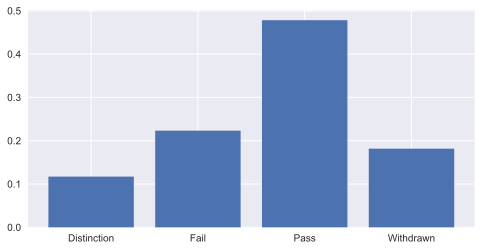

In [81]:
dxp.aggplot(agg='final_result', data=studentInfo_complete_assesed, normalize='all', figsize=(8, 4))

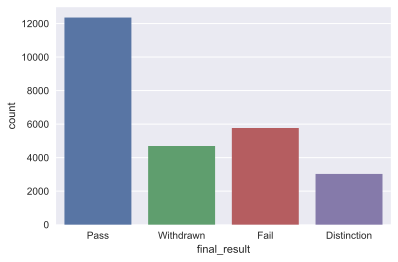

In [82]:
sns.countplot(data=studentInfo_complete_assesed, x='final_result' )

## Around 44% of the withdrawn students were assessed. This means that these students have withdrawn after facing an assesment. Probably they might have felt that the course was tough or they feared that they may not be able to pass


In [83]:
studentInfo_complete_assesed['final_result'].value_counts()

Pass           12358
Fail            5768
Withdrawn       4693
Distinction     3024
Name: final_result, dtype: int64

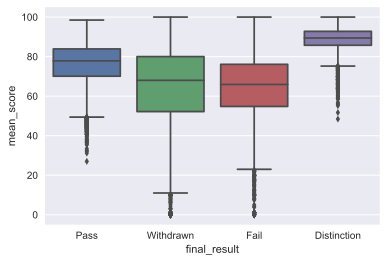

In [84]:
sns.boxplot(x='final_result', y='mean_score', data=studentInfo_complete_assesed)

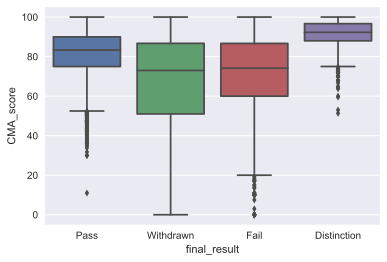

In [85]:
sns.boxplot(x='final_result', y='CMA_score', data=studentInfo_complete_assesed)

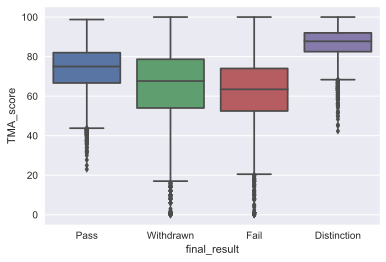

In [86]:
sns.boxplot(x='final_result', y='TMA_score', data=studentInfo_complete_assesed)

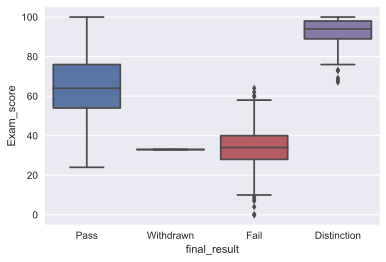

In [87]:
sns.boxplot(x='final_result', y='Exam_score', data=studentInfo_complete_assesed)

## Interaction and Content Metrics

In [88]:
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [89]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [90]:
studentVle.describe(include='object')

,code_module,code_presentation
count,10655280,10655280
unique,7,4
top,FFF,2014J
freq,4014499,3619452


In [91]:
studentVle['id_site'] = studentVle['id_site'].astype('object')
vle['id_site'] = vle['id_site'].astype('object')

In [92]:
vle.describe(include='object')

,id_site,code_module,code_presentation,activity_type
count,6364,6364,6364,6364
unique,6364,7,4,20
top,896957,FFF,2013J,resource
freq,1,1967,1772,2660


In [93]:
studentVle.shape

(10655280, 6)

In [94]:
studentVle['id_student'] = studentVle['id_student'].astype('object')

In [95]:
studentVle.groupby(['id_site', 'code_module','code_presentation' ]).ngroups

6268

In [96]:
vle.groupby(['id_site', 'code_module','code_presentation' ]).ngroups

6364

## There are more students who interacted with the courses than the total number of students who were assesed. Probably some students who registered have interacated with the learning environment have withdrawn before the assesment. 29000 students have interacted but 2500o students have been assesed.

In [97]:
#aggregate and extract sum of clicks
sum_clicks_all = studentVle.groupby(['id_student','code_module','code_presentation'], as_index = False)['id_student','code_module','code_presentation','sum_click'].sum()
sum_clicks_all.head()

,id_student,code_module,code_presentation,sum_click
0,6516,AAA,2014J,2791
1,8462,DDD,2013J,646
2,8462,DDD,2014J,10
3,11391,AAA,2013J,934
4,23629,BBB,2013B,161


In [98]:
sum_clicks_all.groupby(['id_student','code_module','code_presentation']).ngroups

29228

In [99]:
sum_clicks_all.shape

(29228, 4)

In [100]:
# Select all duplicate rows based on one three column
duplicateRowsDF = sum_clicks_all[sum_clicks_all.duplicated(['id_student','code_module','code_presentation'])]
print("Number of duplicated rows", duplicateRowsDF.shape )
duplicateRowsDF.head()

Number of duplicated rows (0, 4)


,id_student,code_module,code_presentation,sum_click


In [101]:
sum_clicks_idsite = studentVle.groupby(['id_student','code_module','code_presentation', 'id_site'], as_index = False)['id_student','code_module','code_presentation', 'id_site', 'sum_click'].sum()
sum_clicks_idsite.head()

,id_student,code_module,code_presentation,id_site,sum_click
0,6516,AAA,2014J,877011,23
1,6516,AAA,2014J,877012,305
2,6516,AAA,2014J,877015,26
3,6516,AAA,2014J,877023,6
4,6516,AAA,2014J,877025,91


In [102]:
sum_clicks_idsite.shape

(1960496, 5)

In [103]:
sum_clicks_idsite.groupby(['id_student','code_module','code_presentation']).ngroups

29228

In [104]:
sum_clicks_idsite['id_student'] = sum_clicks_idsite['id_student'].astype('object')
sum_clicks_idsite['id_site'] = sum_clicks_idsite['id_site'].astype('object')

In [105]:
sum_clicks_idsite.describe(include='object')

,id_student,code_module,code_presentation,id_site
count,1960496,1960496,1960496,1960496
unique,26074,7,4,6268
top,537811,FFF,2014J,909013
freq,579,758569,647080,2300


In [106]:
sum_clicks_idsite.groupby(['code_module', 'code_presentation', 'id_site']).ngroups

6268

In [107]:
# merging sum_clicks_idsite and vle to get number of clicks per activity
vle_clicks_activity = pd.merge(sum_clicks_idsite, vle, how = 'inner', on = ['id_site','code_module','code_presentation'])
vle_clicks_activity.head()

,id_student,code_module,code_presentation,id_site,sum_click,activity_type,week_from,week_to
0,6516,AAA,2014J,877011,23,forumng,NaN,NaN
1,24734,AAA,2014J,877011,37,forumng,NaN,NaN
2,26192,AAA,2014J,877011,2,forumng,NaN,NaN
3,28061,AAA,2014J,877011,57,forumng,NaN,NaN
4,31600,AAA,2014J,877011,20,forumng,NaN,NaN


In [108]:
vle_clicks_activity.sort_values(by=['id_student', 'id_site'], ascending=True).head(10)

,id_student,code_module,code_presentation,id_site,sum_click,activity_type,week_from,week_to
0,6516,AAA,2014J,877011,23,forumng,NaN,NaN
228,6516,AAA,2014J,877012,305,forumng,NaN,NaN
526,6516,AAA,2014J,877015,26,forumng,NaN,NaN
845,6516,AAA,2014J,877023,6,forumng,NaN,NaN
1091,6516,AAA,2014J,877025,91,forumng,NaN,NaN
1394,6516,AAA,2014J,877030,497,homepage,NaN,NaN
1751,6516,AAA,2014J,877031,16,oucontent,NaN,NaN
1934,6516,AAA,2014J,877032,11,oucontent,NaN,NaN
2117,6516,AAA,2014J,877033,7,oucontent,NaN,NaN
2309,6516,AAA,2014J,877034,7,oucontent,NaN,NaN


In [109]:
vle_clicks_activity_sum = vle_clicks_activity.groupby(['id_student','code_module','code_presentation', 'activity_type'],  as_index = False)['id_student','code_module','code_presentation', 'activity_type', 'sum_click'].sum()
vle_clicks_activity_sum.head(3)

,id_student,code_module,code_presentation,activity_type,sum_click
0,6516,AAA,2014J,dataplus,21
1,6516,AAA,2014J,forumng,451
2,6516,AAA,2014J,homepage,497


In [110]:
vle_clicks_activity_sum.groupby(['id_student','code_module','code_presentation']).ngroups

29228

In [111]:
vle_clicks_activity_sum["id_student"] = vle_clicks_activity_sum["id_student"].astype(str)
vle_clicks_activity_sum["unique"]=vle_clicks_activity_sum[['id_student','code_module','code_presentation']].apply('_'.join, axis=1)
vle_clicks_activity_sum.head()

,id_student,code_module,code_presentation,activity_type,sum_click,unique
0,6516,AAA,2014J,dataplus,21,6516_AAA_2014J
1,6516,AAA,2014J,forumng,451,6516_AAA_2014J
2,6516,AAA,2014J,homepage,497,6516_AAA_2014J
3,6516,AAA,2014J,oucontent,1505,6516_AAA_2014J
4,6516,AAA,2014J,resource,31,6516_AAA_2014J


In [112]:
vle_clicks_activity_sum.sort_values(by=['id_student','activity_type'], ascending=True).head(20)

,id_student,code_module,code_presentation,activity_type,sum_click,unique
4656,100064,FFF,2013J,dataplus,26,100064_FFF_2013J
4657,100064,FFF,2013J,dualpane,16,100064_FFF_2013J
4658,100064,FFF,2013J,folder,6,100064_FFF_2013J
4659,100064,FFF,2013J,forumng,567,100064_FFF_2013J
4660,100064,FFF,2013J,homepage,793,100064_FFF_2013J
4661,100064,FFF,2013J,oucollaborate,3,100064_FFF_2013J
4662,100064,FFF,2013J,oucontent,3559,100064_FFF_2013J
4663,100064,FFF,2013J,ouwiki,59,100064_FFF_2013J
4664,100064,FFF,2013J,page,25,100064_FFF_2013J
4665,100064,FFF,2013J,questionnaire,34,100064_FFF_2013J


In [113]:
vle_clicks_activity_sum_pivot=vle_clicks_activity_sum.pivot(index= 'unique', columns='activity_type', values='sum_click')
vle_clicks_activity_sum_pivot.head()

activity_type,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
unique,,,,,,,,,,,,,,,,,,,,
100064_FFF_2013J,26.0,16.0,NaN,6.0,567.0,NaN,793.0,NaN,3.0,3559.0,NaN,59.0,25.0,34.0,705.0,NaN,68.0,NaN,590.0,63.0
100282_BBB_2013J,NaN,NaN,NaN,NaN,11.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,3.0,1.0
100561_DDD_2014J,NaN,NaN,32.0,NaN,331.0,NaN,222.0,NaN,11.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,158.0,32.0
100621_CCC_2014B,NaN,NaN,NaN,NaN,1.0,NaN,30.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,16.0,1.0
1006742_FFF_2014B,NaN,1.0,NaN,NaN,349.0,NaN,526.0,NaN,2.0,753.0,NaN,121.0,16.0,9.0,195.0,NaN,93.0,NaN,310.0,46.0


In [114]:
vle_clicks_activity_sum_pivot.groupby(['unique']).ngroups

29228

In [115]:
vle_clicks_activity_sum_pivot.shape

(29228, 20)

In [116]:
vle_clicks_activity_sum_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29228 entries, 100064_FFF_2013J to 99993_FFF_2013B
Data columns (total 20 columns):
dataplus          2710 non-null float64
dualpane          3707 non-null float64
externalquiz      4882 non-null float64
folder            1934 non-null float64
forumng           26006 non-null float64
glossary          6036 non-null float64
homepage          29185 non-null float64
htmlactivity      1918 non-null float64
oucollaborate     10890 non-null float64
oucontent         26922 non-null float64
ouelluminate      2501 non-null float64
ouwiki            10616 non-null float64
page              8728 non-null float64
questionnaire     4511 non-null float64
quiz              19973 non-null float64
repeatactivity    3 non-null float64
resource          27596 non-null float64
sharedsubpage     128 non-null float64
subpage           28210 non-null float64
url               23901 non-null float64
dtypes: float64(20)
memory usage: 4.7+ MB


In [117]:
nblevels = vle_clicks_activity_sum_pivot.index.nlevels
nblevels

1

In [118]:
vle_clicks_activity_sum_pivot.index

Index(['100064_FFF_2013J', '100282_BBB_2013J', '100561_DDD_2014J',
       '100621_CCC_2014B', '1006742_FFF_2014B', '100788_CCC_2014J',
       '100788_FFF_2013J', '1008675_BBB_2013B', '100893_AAA_2013J',
       '101116_AAA_2014J',
       ...
       '991843_EEE_2013J', '992544_CCC_2014B', '996047_EEE_2014B',
       '99609_DDD_2014J', '99670_FFF_2014B', '997948_DDD_2014B',
       '99799_BBB_2014B', '998493_AAA_2014J', '999174_FFF_2013B',
       '99993_FFF_2013B'],
      dtype='object', name='unique', length=29228)

In [119]:
vle_clicks_activity_sum_pivot.columns

Index(['dataplus', 'dualpane', 'externalquiz', 'folder', 'forumng', 'glossary',
       'homepage', 'htmlactivity', 'oucollaborate', 'oucontent',
       'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url'],
      dtype='object', name='activity_type')

In [120]:
vle_clicks_activity_sum_pivot = vle_clicks_activity_sum_pivot.reset_index()
vle_clicks_activity_sum_pivot.head()

activity_type,unique,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,100064_FFF_2013J,26.0,16.0,NaN,6.0,567.0,NaN,793.0,NaN,3.0,...,NaN,59.0,25.0,34.0,705.0,NaN,68.0,NaN,590.0,63.0
1,100282_BBB_2013J,NaN,NaN,NaN,NaN,11.0,NaN,25.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,3.0,1.0
2,100561_DDD_2014J,NaN,NaN,32.0,NaN,331.0,NaN,222.0,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,158.0,32.0
3,100621_CCC_2014B,NaN,NaN,NaN,NaN,1.0,NaN,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,16.0,1.0
4,1006742_FFF_2014B,NaN,1.0,NaN,NaN,349.0,NaN,526.0,NaN,2.0,...,NaN,121.0,16.0,9.0,195.0,NaN,93.0,NaN,310.0,46.0


In [121]:
# Select all duplicate rows based on one three column
duplicateRowsDF = vle_clicks_activity_sum_pivot[vle_clicks_activity_sum_pivot.duplicated(['unique'])]
print("Number of duplicated rows", duplicateRowsDF.shape )
duplicateRowsDF.head()

Number of duplicated rows (0, 21)


activity_type,unique,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url


In [124]:
vle_clicks_activity_sum_pivot.columns

Index(['unique', 'dataplus', 'dualpane', 'externalquiz', 'folder', 'forumng',
       'glossary', 'homepage', 'htmlactivity', 'oucollaborate', 'oucontent',
       'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url'],
      dtype='object', name='activity_type')

In [125]:
nlevels = vle_clicks_activity_sum_pivot.index.nlevels
nlevels

1

In [126]:
vle_clicks_activity_sum_pivot.shape

(29228, 21)

In [127]:
vle_clicks_activity_sum['activity_type'].describe(include='object')

count       240357
unique          20
top       homepage
freq         29185
Name: activity_type, dtype: object

In [128]:
vle_clicks_activity_sum_pivot.isnull().sum()

activity_type
unique                0
dataplus          26518
dualpane          25521
externalquiz      24346
folder            27294
forumng            3222
glossary          23192
homepage             43
htmlactivity      27310
oucollaborate     18338
oucontent          2306
ouelluminate      26727
ouwiki            18612
page              20500
questionnaire     24717
quiz               9255
repeatactivity    29225
resource           1632
sharedsubpage     29100
subpage            1018
url                5327
dtype: int64

In [129]:
vle_clicks_activity_sum_pivot.shape

(29228, 21)

In [130]:
vle_clicks_activity_sum.shape

(240357, 6)

In [131]:
vle_clicks_activity_sum_pivot.fillna(0, inplace=True)
vle_clicks_activity_sum_pivot.isnull().sum()

activity_type
unique            0
dataplus          0
dualpane          0
externalquiz      0
folder            0
forumng           0
glossary          0
homepage          0
htmlactivity      0
oucollaborate     0
oucontent         0
ouelluminate      0
ouwiki            0
page              0
questionnaire     0
quiz              0
repeatactivity    0
resource          0
sharedsubpage     0
subpage           0
url               0
dtype: int64

In [132]:
vle_clicks_activity_sum['id_student'] = vle_clicks_activity_sum['id_student'].astype('object')

In [133]:
vle_clicks_activity_sum.describe(include='object')

,id_student,code_module,code_presentation,activity_type,unique
count,240357,240357,240357,240357,240357
unique,26074,7,4,20,29228
top,2681198,FFF,2014J,homepage,649004_FFF_2014J
freq,39,76386,81526,29185,15


In [134]:
vle_clicks_activity_sum_pivot.shape

(29228, 21)

In [135]:
vle_clicks_activity_sum_pivot.head()

activity_type,unique,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,100064_FFF_2013J,26.0,16.0,0.0,6.0,567.0,0.0,793.0,0.0,3.0,...,0.0,59.0,25.0,34.0,705.0,0.0,68.0,0.0,590.0,63.0
1,100282_BBB_2013J,0.0,0.0,0.0,0.0,11.0,0.0,25.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0
2,100561_DDD_2014J,0.0,0.0,32.0,0.0,331.0,0.0,222.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0,158.0,32.0
3,100621_CCC_2014B,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,16.0,1.0
4,1006742_FFF_2014B,0.0,1.0,0.0,0.0,349.0,0.0,526.0,0.0,2.0,...,0.0,121.0,16.0,9.0,195.0,0.0,93.0,0.0,310.0,46.0


In [136]:
sum_clicks_all.head()

,id_student,code_module,code_presentation,sum_click
0,6516,AAA,2014J,2791
1,8462,DDD,2013J,646
2,8462,DDD,2014J,10
3,11391,AAA,2013J,934
4,23629,BBB,2013B,161


In [137]:
sum_clicks_all.sort_values(by=['id_student'], ascending=True).head()

,id_student,code_module,code_presentation,sum_click
0,6516,AAA,2014J,2791
1,8462,DDD,2013J,646
2,8462,DDD,2014J,10
3,11391,AAA,2013J,934
4,23629,BBB,2013B,161


In [138]:
sum_clicks_all.shape

(29228, 4)

In [139]:
#sum of days extracted
sum_days = studentVle.groupby(['id_student','code_module','code_presentation'], as_index = False)['date'].apply(lambda x: len(x.unique())).reset_index()
sum_days.rename(columns = {0:'days_interacted'}, inplace = True)
sum_days.head()

,id_student,code_module,code_presentation,days_interacted
0,6516,AAA,2014J,159
1,8462,DDD,2013J,56
2,8462,DDD,2014J,1
3,11391,AAA,2013J,40
4,23629,BBB,2013B,16


In [140]:
sum_days.groupby(['id_student','code_module','code_presentation']).ngroups

29228

In [141]:
# Select all duplicate rows based on one three column
duplicateRowsDF = sum_days[sum_days.duplicated(['id_student','code_module','code_presentation'])]
print("Number of duplicated rows", duplicateRowsDF.shape )
duplicateRowsDF.head()

Number of duplicated rows (0, 4)


,id_student,code_module,code_presentation,days_interacted


In [142]:
#daily clicks extracted
vle_clicks = pd.merge(sum_clicks_all, sum_days, how = 'inner', on = ['id_student','code_module','code_presentation'])
vle_clicks['daily_click'] = vle_clicks['sum_click']/vle_clicks['days_interacted']
vle_clicks.head()

,id_student,code_module,code_presentation,sum_click,days_interacted,daily_click
0,6516,AAA,2014J,2791,159,17.553459
1,8462,DDD,2013J,646,56,11.535714
2,8462,DDD,2014J,10,1,10.000000
3,11391,AAA,2013J,934,40,23.350000
4,23629,BBB,2013B,161,16,10.062500


In [143]:
vle_clicks.shape

(29228, 6)

In [144]:
# Select all duplicate rows based on one three column
duplicateRowsDF = vle_clicks[vle_clicks.duplicated(['id_student','code_module','code_presentation'])]
print("Number of duplicated rows", duplicateRowsDF.shape )
duplicateRowsDF.head()

Number of duplicated rows (0, 6)


,id_student,code_module,code_presentation,sum_click,days_interacted,daily_click


In [145]:
vle_clicks.groupby(['id_student', 'code_module', 'code_presentation']).ngroups

29228

In [146]:
#Extract material counts of each course module and semester
vle_type = pd.read_csv('vle.csv')
vle_type = vle_type.groupby(['code_module','code_presentation','activity_type'], as_index=False).count()
vle_type.rename(columns = {'id_site':'count'}, inplace = True)
vle_type = vle_type[['code_module','code_presentation', 'activity_type', 'count' ]]
vle_type.head()

,code_module,code_presentation,activity_type,count
0,AAA,2013J,dataplus,4
1,AAA,2013J,forumng,15
2,AAA,2013J,glossary,2
3,AAA,2013J,homepage,1
4,AAA,2013J,oucollaborate,2


In [147]:
vle_pivot.shape

NameError: name 'vle_pivot' is not defined

In [148]:
vle_clicks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29228 entries, 0 to 29227
Data columns (total 6 columns):
id_student           29228 non-null int64
code_module          29228 non-null object
code_presentation    29228 non-null object
sum_click            29228 non-null int64
days_interacted      29228 non-null int64
daily_click          29228 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.6+ MB


In [149]:
vle_clicks['id_student'] = vle_clicks['id_student'].astype('object')

In [150]:
vle_clicks_activity_sum_pivot.head()

activity_type,unique,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,100064_FFF_2013J,26.0,16.0,0.0,6.0,567.0,0.0,793.0,0.0,3.0,...,0.0,59.0,25.0,34.0,705.0,0.0,68.0,0.0,590.0,63.0
1,100282_BBB_2013J,0.0,0.0,0.0,0.0,11.0,0.0,25.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0
2,100561_DDD_2014J,0.0,0.0,32.0,0.0,331.0,0.0,222.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0,158.0,32.0
3,100621_CCC_2014B,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,16.0,1.0
4,1006742_FFF_2014B,0.0,1.0,0.0,0.0,349.0,0.0,526.0,0.0,2.0,...,0.0,121.0,16.0,9.0,195.0,0.0,93.0,0.0,310.0,46.0


In [151]:
vle_clicks_activity_sum_pivot.shape

(29228, 21)

In [152]:
duplicateRowsDF = vle_clicks_activity_sum_pivot[vle_clicks_activity_sum_pivot.duplicated()]
duplicateRowsDF.head()

activity_type,unique,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url


In [153]:
vle_clicks["id_student"] = vle_clicks["id_student"].astype(str)
vle_clicks["unique"]=vle_clicks[['id_student','code_module','code_presentation']].apply('_'.join, axis=1)
vle_clicks.head()

,id_student,code_module,code_presentation,sum_click,days_interacted,daily_click,unique
0,6516,AAA,2014J,2791,159,17.553459,6516_AAA_2014J
1,8462,DDD,2013J,646,56,11.535714,8462_DDD_2013J
2,8462,DDD,2014J,10,1,10.000000,8462_DDD_2014J
3,11391,AAA,2013J,934,40,23.350000,11391_AAA_2013J
4,23629,BBB,2013B,161,16,10.062500,23629_BBB_2013B


In [154]:
# Select all duplicate rows based on one three column
duplicateRowsDF = vle_clicks[vle_clicks.duplicated(['id_student','code_module','code_presentation'])]
print("Number of duplicated rows", duplicateRowsDF.shape )
duplicateRowsDF.head()

Number of duplicated rows (0, 7)


,id_student,code_module,code_presentation,sum_click,days_interacted,daily_click,unique


In [155]:
vle_clicks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29228 entries, 0 to 29227
Data columns (total 7 columns):
id_student           29228 non-null object
code_module          29228 non-null object
code_presentation    29228 non-null object
sum_click            29228 non-null int64
days_interacted      29228 non-null int64
daily_click          29228 non-null float64
unique               29228 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 1.8+ MB


In [156]:
vle_clicks.shape

(29228, 7)

In [157]:
vle_clicks.sort_values(by=['unique'], ascending=True).head()

,id_student,code_module,code_presentation,sum_click,days_interacted,daily_click,unique
569,100064,FFF,2013J,6514,195,33.405128,100064_FFF_2013J
570,100282,BBB,2013J,42,5,8.400000,100282_BBB_2013J
571,100561,DDD,2014J,950,112,8.482143,100561_DDD_2014J
572,100621,CCC,2014B,59,7,8.428571,100621_CCC_2014B
26099,1006742,FFF,2014B,2421,53,45.679245,1006742_FFF_2014B


In [158]:
vle_clicks_activity_sum_pivot.sort_values(by=['unique'], ascending=True).head()

activity_type,unique,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,100064_FFF_2013J,26.0,16.0,0.0,6.0,567.0,0.0,793.0,0.0,3.0,...,0.0,59.0,25.0,34.0,705.0,0.0,68.0,0.0,590.0,63.0
1,100282_BBB_2013J,0.0,0.0,0.0,0.0,11.0,0.0,25.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0
2,100561_DDD_2014J,0.0,0.0,32.0,0.0,331.0,0.0,222.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0,158.0,32.0
3,100621_CCC_2014B,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,16.0,1.0
4,1006742_FFF_2014B,0.0,1.0,0.0,0.0,349.0,0.0,526.0,0.0,2.0,...,0.0,121.0,16.0,9.0,195.0,0.0,93.0,0.0,310.0,46.0


In [159]:
duplicateRows_vle_clicks_activity_sum_pivot = vle_clicks_activity_sum_pivot[vle_clicks_activity_sum_pivot.duplicated(['unique'])]
print("Number of Duplicated Rows", duplicateRows_vle_clicks_activity_sum_pivot.shape)
duplicateRows_vle_clicks_activity_sum_pivot.head()

Number of Duplicated Rows (0, 21)


activity_type,unique,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url


In [160]:
vle_clicks.sort_values(by=['unique'], ascending=True).head(10)

,id_student,code_module,code_presentation,sum_click,days_interacted,daily_click,unique
569,100064,FFF,2013J,6514,195,33.405128,100064_FFF_2013J
570,100282,BBB,2013J,42,5,8.400000,100282_BBB_2013J
571,100561,DDD,2014J,950,112,8.482143,100561_DDD_2014J
572,100621,CCC,2014B,59,7,8.428571,100621_CCC_2014B
26099,1006742,FFF,2014B,2421,53,45.679245,1006742_FFF_2014B
573,100788,CCC,2014J,1261,98,12.867347,100788_CCC_2014J
574,100788,FFF,2013J,3134,142,22.070423,100788_FFF_2013J
26100,1008675,BBB,2013B,1913,163,11.736196,1008675_BBB_2013B
575,100893,AAA,2013J,744,52,14.307692,100893_AAA_2013J
576,101116,AAA,2014J,1769,126,14.039683,101116_AAA_2014J


In [161]:
duplicateRows_vle_clicks = vle_clicks[vle_clicks.duplicated(['unique'])]
print("Number of Duplicated Rows", duplicateRows_vle_clicks.shape)
duplicateRows_vle_clicks.head()

Number of Duplicated Rows (0, 7)


,id_student,code_module,code_presentation,sum_click,days_interacted,daily_click,unique


In [162]:
vle_clicks_activity_sum_pivot.shape

(29228, 21)

In [163]:
vle_clicks_final = pd.merge(vle_clicks_activity_sum_pivot, vle_clicks, how='inner', on = ['unique'])
print("Shape of vle_clicks_final", vle_clicks_final.shape)
vle_clicks_final.head()

Shape of vle_clicks_final (29228, 27)


,unique,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,resource,sharedsubpage,subpage,url,id_student,code_module,code_presentation,sum_click,days_interacted,daily_click
0,100064_FFF_2013J,26.0,16.0,0.0,6.0,567.0,0.0,793.0,0.0,3.0,...,68.0,0.0,590.0,63.0,100064,FFF,2013J,6514,195,33.405128
1,100282_BBB_2013J,0.0,0.0,0.0,0.0,11.0,0.0,25.0,0.0,0.0,...,1.0,0.0,3.0,1.0,100282,BBB,2013J,42,5,8.400000
2,100561_DDD_2014J,0.0,0.0,32.0,0.0,331.0,0.0,222.0,0.0,11.0,...,76.0,0.0,158.0,32.0,100561,DDD,2014J,950,112,8.482143
3,100621_CCC_2014B,0.0,0.0,0.0,0.0,1.0,0.0,30.0,0.0,0.0,...,2.0,0.0,16.0,1.0,100621,CCC,2014B,59,7,8.428571
4,1006742_FFF_2014B,0.0,1.0,0.0,0.0,349.0,0.0,526.0,0.0,2.0,...,93.0,0.0,310.0,46.0,1006742,FFF,2014B,2421,53,45.679245


In [164]:
vle_clicks_final.columns

Index(['unique', 'dataplus', 'dualpane', 'externalquiz', 'folder', 'forumng',
       'glossary', 'homepage', 'htmlactivity', 'oucollaborate', 'oucontent',
       'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url',
       'id_student', 'code_module', 'code_presentation', 'sum_click',
       'days_interacted', 'daily_click'],
      dtype='object')

In [165]:
vle_clicks_final.fillna(0, inplace=True)
vle_clicks_final.isnull().sum()

unique               0
dataplus             0
dualpane             0
externalquiz         0
folder               0
forumng              0
glossary             0
homepage             0
htmlactivity         0
oucollaborate        0
oucontent            0
ouelluminate         0
ouwiki               0
page                 0
questionnaire        0
quiz                 0
repeatactivity       0
resource             0
sharedsubpage        0
subpage              0
url                  0
id_student           0
code_module          0
code_presentation    0
sum_click            0
days_interacted      0
daily_click          0
dtype: int64

In [166]:
studentInfo_complete_assesed.shape

(25843, 20)

In [167]:
studentInfo_complete_assesed["id_student"] = studentInfo_complete_assesed["id_student"].astype(str)
studentInfo_complete_assesed["unique"]=studentInfo_complete_assesed[['id_student','code_module','code_presentation']].apply('_'.join, axis=1)
studentInfo_complete_assesed.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,final_result,date_registration,date_unregistration,date_registration_pos,registration_before,mean_score,CMA_score,TMA_score,Exam_score,unique
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,-159.0,NaN,159.0,Yes,82.0,NaN,82.0,NaN,11391_AAA_2013J
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,Pass,-53.0,NaN,53.0,Yes,66.4,NaN,66.4,NaN,28400_AAA_2013J
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,Pass,-52.0,NaN,52.0,Yes,76.0,NaN,76.0,NaN,31604_AAA_2013J
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,Pass,-176.0,NaN,176.0,Yes,54.4,NaN,54.4,NaN,32885_AAA_2013J
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,...,Pass,-110.0,NaN,110.0,Yes,68.0,NaN,68.0,NaN,38053_AAA_2013J


In [168]:
studentInfo_complete_assesed.shape

(25843, 21)

In [169]:
studentInfo_complete_assesed.sort_values(by=['unique'], ascending=True).head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,final_result,date_registration,date_unregistration,date_registration_pos,registration_before,mean_score,CMA_score,TMA_score,Exam_score,unique
18843,FFF,2013J,100064,F,West Midlands Region,A Level or Equivalent,0-10%,35-55,0,60,...,Pass,-136.0,NaN,136.0,Yes,89.333333,87.428571,92.000000,NaN,100064_FFF_2013J
2103,BBB,2013J,100282,F,Wales,Lower Than A Level,20-30%,0-35,1,120,...,Withdrawn,-54.0,207.0,54.0,Yes,78.000000,NaN,78.000000,NaN,100282_BBB_2013J
13741,DDD,2014J,100561,M,East Anglian Region,Lower Than A Level,70-80%,0-35,1,60,...,Fail,-35.0,NaN,35.0,Yes,67.142857,NaN,73.166667,31.0,100561_DDD_2014J
21769,FFF,2014B,1006742,M,Scotland,HE Qualification,80-90%,55<=,1,120,...,Fail,-78.0,NaN,78.0,Yes,78.500000,79.000000,78.000000,NaN,1006742_FFF_2014B
8236,CCC,2014J,100788,M,Scotland,HE Qualification,80-90%,0-35,1,60,...,Distinction,-103.0,NaN,103.0,Yes,91.200000,90.000000,NaN,96.0,100788_CCC_2014J


In [170]:
duplicateRows_vle_clicks = studentInfo_complete_assesed[studentInfo_complete_assesed.duplicated(['unique'])]
print("Number of Duplicated Rows", duplicateRows_vle_clicks.shape)
duplicateRows_vle_clicks.head()

Number of Duplicated Rows (0, 21)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,final_result,date_registration,date_unregistration,date_registration_pos,registration_before,mean_score,CMA_score,TMA_score,Exam_score,unique


In [171]:
## Final Merging of complete Data
Final_Data = pd.merge(studentInfo_complete_assesed, vle_clicks_final, how='inner', on = ['unique'])
print("Shape of Final_Data", Final_Data.shape)
Final_Data.head()

Shape of Final_Data (25793, 47)


,code_module_x,code_presentation_x,id_student_x,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,resource,sharedsubpage,subpage,url,id_student_y,code_module_y,code_presentation_y,sum_click,days_interacted,daily_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,13.0,0.0,32.0,5.0,11391,AAA,2013J,934,40,23.350000
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,12.0,0.0,87.0,48.0,28400,AAA,2013J,1435,80,17.937500
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,19.0,0.0,144.0,90.0,31604,AAA,2013J,2158,123,17.544715
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,45.0,0.0,79.0,14.0,32885,AAA,2013J,1034,70,14.771429
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,...,11.0,0.0,91.0,45.0,38053,AAA,2013J,2445,143,17.097902


In [172]:
Final_Data.columns

Index(['code_module_x', 'code_presentation_x', 'id_student_x', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result',
       'date_registration', 'date_unregistration', 'date_registration_pos',
       'registration_before', 'mean_score', 'CMA_score', 'TMA_score',
       'Exam_score', 'unique', 'dataplus', 'dualpane', 'externalquiz',
       'folder', 'forumng', 'glossary', 'homepage', 'htmlactivity',
       'oucollaborate', 'oucontent', 'ouelluminate', 'ouwiki', 'page',
       'questionnaire', 'quiz', 'repeatactivity', 'resource', 'sharedsubpage',
       'subpage', 'url', 'id_student_y', 'code_module_y',
       'code_presentation_y', 'sum_click', 'days_interacted', 'daily_click'],
      dtype='object')

In [173]:
Final_Data.drop(columns=['id_student_y', 'code_module_y','code_presentation_y'], inplace=True)
Final_Data.columns

Index(['code_module_x', 'code_presentation_x', 'id_student_x', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result',
       'date_registration', 'date_unregistration', 'date_registration_pos',
       'registration_before', 'mean_score', 'CMA_score', 'TMA_score',
       'Exam_score', 'unique', 'dataplus', 'dualpane', 'externalquiz',
       'folder', 'forumng', 'glossary', 'homepage', 'htmlactivity',
       'oucollaborate', 'oucontent', 'ouelluminate', 'ouwiki', 'page',
       'questionnaire', 'quiz', 'repeatactivity', 'resource', 'sharedsubpage',
       'subpage', 'url', 'sum_click', 'days_interacted', 'daily_click'],
      dtype='object')

In [174]:
Final_Data.head()

,code_module_x,code_presentation_x,id_student_x,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,sum_click,days_interacted,daily_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,13.0,0.0,32.0,5.0,934,40,23.350000
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,12.0,0.0,87.0,48.0,1435,80,17.937500
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0.0,0.0,0.0,19.0,0.0,144.0,90.0,2158,123,17.544715
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,45.0,0.0,79.0,14.0,1034,70,14.771429
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,...,0.0,0.0,0.0,11.0,0.0,91.0,45.0,2445,143,17.097902


In [175]:
#Renaming Columns
Final_Data.rename(columns={'code_module_x': 'code_module', 'code_presentation_x': 'code_presentation', 'id_student_x': 'id_student'}, inplace=True)
Final_Data.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'date_registration',
       'date_unregistration', 'date_registration_pos', 'registration_before',
       'mean_score', 'CMA_score', 'TMA_score', 'Exam_score', 'unique',
       'dataplus', 'dualpane', 'externalquiz', 'folder', 'forumng', 'glossary',
       'homepage', 'htmlactivity', 'oucollaborate', 'oucontent',
       'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url',
       'sum_click', 'days_interacted', 'daily_click'],
      dtype='object')

In [176]:
cols = list(Final_Data.columns.values)
cols

['code_module',
 'code_presentation',
 'id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'final_result',
 'date_registration',
 'date_unregistration',
 'date_registration_pos',
 'registration_before',
 'mean_score',
 'CMA_score',
 'TMA_score',
 'Exam_score',
 'unique',
 'dataplus',
 'dualpane',
 'externalquiz',
 'folder',
 'forumng',
 'glossary',
 'homepage',
 'htmlactivity',
 'oucollaborate',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'questionnaire',
 'quiz',
 'repeatactivity',
 'resource',
 'sharedsubpage',
 'subpage',
 'url',
 'sum_click',
 'days_interacted',
 'daily_click']

In [177]:
cols = ['id_student', 'code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability',  'date_registration',
       'date_unregistration', 'date_registration_pos', 'registration_before',
       'mean_score', 'CMA_score', 'TMA_score', 'Exam_score', 'unique',
       'dataplus', 'dualpane', 'externalquiz', 'folder', 'forumng', 'glossary',
       'homepage', 'htmlactivity', 'oucollaborate', 'oucontent',
       'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url',
       'sum_click', 'days_interacted', 'daily_click', 'final_result']

In [178]:
#Rearranging Columns
Final_Data = Final_Data.reindex(columns=cols)
Final_Data.head()

,id_student,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,quiz,repeatactivity,resource,sharedsubpage,subpage,url,sum_click,days_interacted,daily_click,final_result
0,11391,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,13.0,0.0,32.0,5.0,934,40,23.350000,Pass
1,28400,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,12.0,0.0,87.0,48.0,1435,80,17.937500,Pass
2,31604,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0.0,0.0,19.0,0.0,144.0,90.0,2158,123,17.544715,Pass
3,32885,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,45.0,0.0,79.0,14.0,1034,70,14.771429,Pass
4,38053,AAA,2013J,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,...,0.0,0.0,11.0,0.0,91.0,45.0,2445,143,17.097902,Pass


In [179]:
Final_Data.to_csv('Open_Univ_Data_Final.csv')